Correlation- Part 1
Like covariance, Pearson Correlation (often referred to simply as “correlation”) is a scaled form of covariance. It also measures the strength of a linear relationship, but ranges from -1 to +1, making it more interpretable.

Highly associated variableswith a positive linear relationship will have a correlation close to 1. Highly associated variables with a negative linear relationship will have a correlation close to -1. Variables that do not have a linear association (or a linear association with a slope of zero) will have correlations close to 0.

This figure shows 5 different plots.

 From left to right, the plots show a correlation of 1, a large positive correlation, no correlation, a large negative correlation, and a correlation of -1.)
 
 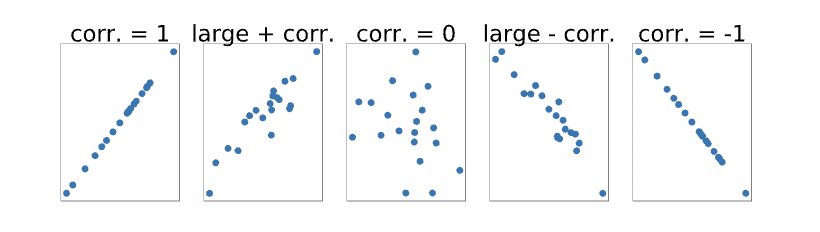

The pearsonr() function from scipy.stats can be used to calculate correlation as follows:

``` Python
from scipy.stats import pearsonr
corr_price_sqfeet, p = pearsonr(housing.price, housing.sqfeet)
print(corr_price_sqfeet) #output: 0.507
```

Generally, a correlation larger than about .3 indicates a linear association. A correlation greater than about .6 suggestions a strong linear association.

In [3]:
pip install scipy

     |████████████████████████████████| 30.3 MB 4.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/logambigaikuppusamy/Documents/DataScience/Financeanalyst/venv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


   price       type  sqfeet  beds  baths      lat      long
0    615  apartment     364     0    1.0  35.1653 -101.8840
1   1346  apartment     816     1    1.0  32.9865  -96.6860
2    900  apartment     500     1    1.0  30.2355  -97.7292
3    650  apartment     700     1    1.0  26.1923  -98.2657
4   1330  apartment    1040     2    2.0  30.6380  -96.2940
0.8060022524416033


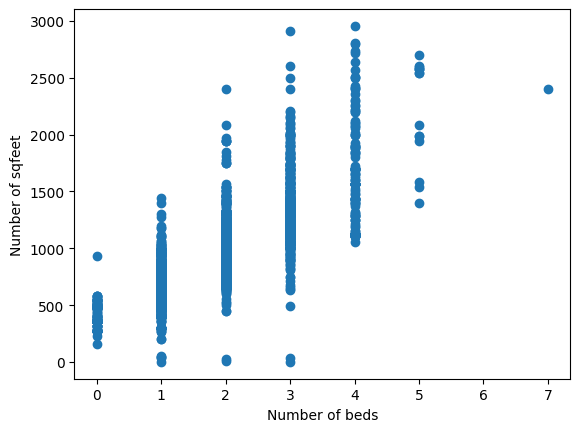

In [6]:
# Sample code to practice with pearsonr()
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr

housing = pd.read_csv('housing_sample.csv' )
print(housing.head())

# calculate corr_sqfeet_beds and print it out:
corr_sqfeet_beds, beds = pearsonr(housing.sqfeet,housing.beds)
print(corr_sqfeet_beds)
# create the scatter plot here:
plt.xlabel('Number of beds')
plt.ylabel('Number of sqfeet')
plt.scatter(x = housing.beds, y = housing.sqfeet)
plt.show()

   price       type  sqfeet  beds  baths      lat      long
0    615  apartment     364     0    1.0  35.1653 -101.8840
1   1346  apartment     816     1    1.0  32.9865  -96.6860
2    900  apartment     500     1    1.0  30.2355  -97.7292
3    650  apartment     700     1    1.0  26.1923  -98.2657
4   1330  apartment    1040     2    2.0  30.6380  -96.2940
0.8060022524416033


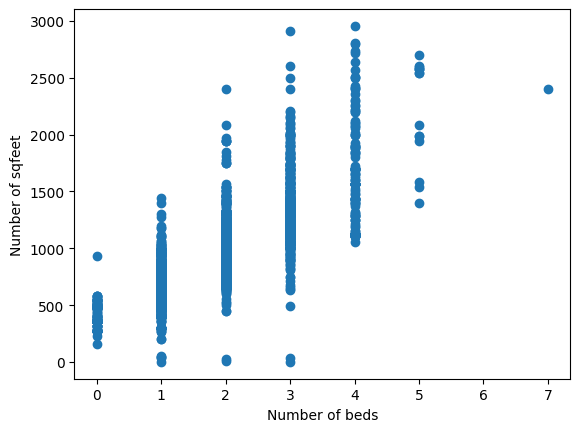

In [6]:
# Sample code to practice with pearsonr()
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr

housing = pd.read_csv('housing_sample.csv' )
print(housing.head())

# calculate corr_sqfeet_beds and print it out:
corr_sqfeet_beds, beds = pearsonr(housing.sqfeet,housing.beds)
print(corr_sqfeet_beds)
# create the scatter plot here:
plt.xlabel('Number of beds')
plt.ylabel('Number of sqfeet')
plt.scatter(x = housing.beds, y = housing.sqfeet)
plt.show()

Correlation Part 2
It’s important to note that there are some limitations to using correlation or covariance as a way of assessing whether there is an association between two variables. Because correlation and covariance both measure the strength of linear relationships with non-zero slopes, but not other kinds of relationships, correlation can be misleading.

For example, the four scatter plots below all show pairs of variables with near-zero correlations. The bottom left image shows an example of a perfect linear association where the slope is zero (the line is horizontal). Meanwhile, the other three plots show non-linear relationships — if we drew a line through any of these sets of points, that line would need to be curved, not straight!

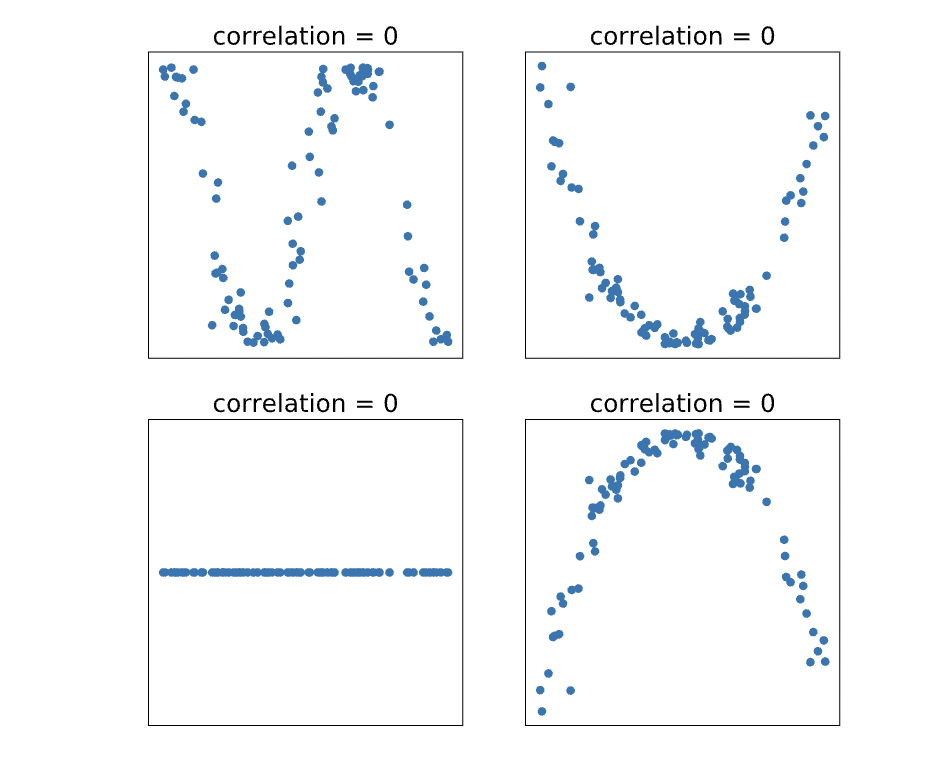

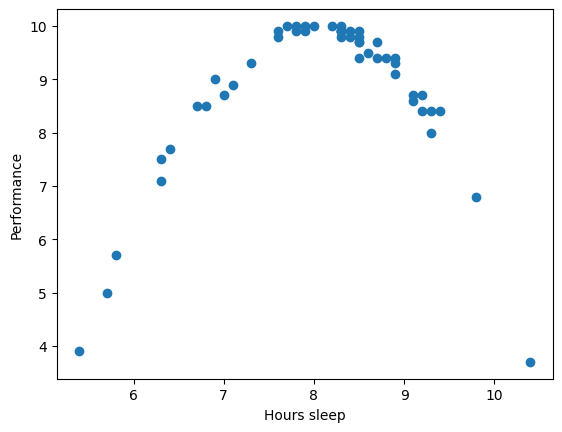

0.28149781890494124


In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr

sleep = pd.read_csv('sleep_performance.csv')

# create your scatter plot here:
plt.scatter(x=sleep.hours_sleep, y=sleep.performance)
plt.xlabel('Hours sleep')
plt.ylabel('Performance')
plt.show()


# calculate the correlation for `hours_sleep` and `performance`:

corr_sleep_performance,p = pearsonr(sleep.hours_sleep,sleep.performance)
print(corr_sleep_performance)


we’ll explore a sample of data from the Narcissistic Personality Inventory (NPI-40), a personality test with 40 questions about personal preferences and self-view. There are two possible responses to each question. The sample we’ll be working with contains responses to the following:

influence: yes = I have a natural talent for influencing people; no = I am not good at influencing people.
blend_in: yes = I prefer to blend in with the crowd; no = I like to be the center of attention.
special: yes = I think I am a special person; no = I am no better or worse than most people.
leader: yes = I see myself as a good leader; no = I am not sure if I would make a good leader.
authority: yes = I like to have authority over other people; no = I don’t mind following orders.

# Contingency Tables: Frequencies
Contingency(refers to something that might happen in the future, typically a possible event or condition that you plan for just in case it occurs and in business,backup plan or reserve for dealing with unexpected problems:-> contingency fund) tables, also known as two-way tables or cross-tabulations, are useful for summarizing two variables at the same time. 

For example, suppose we are interested in understanding whether there is an association between influence (whether a person thinks they have a talent for influencing people) and leader (whether they see themself as a leader). We can use the crosstab function from pandas to create a contingency table:

influence_leader_freq = pd.crosstab(npi.influence, npi.leader)
print(influence_leader_freq)

### Output
leader       no   yes
influence            
no         3015  1293
yes        2360  4429

This table tells us the number of people who gave each possible combination of responses to these two questions. For example, 2360 people said that they do not see themselves as a leader but have a talent for influencing people.

To assess whether there is an association between these two variables, we need to ask whether information about one variable gives us information about the other. In this example, we see that among people who don’t see themselves as a leader (the first column), a larger number (3015) don’t think they have a talent for influencing people. Meanwhile, among people who do see themselves as a leader (the second column), a larger number (4429) do think they have a talent for influencing people.

In [12]:
import pandas as pd

npi = pd.read_csv("npi_sample.csv")
# print(npi)
# print(npi.columns)

special_authority_freq = pd.crosstab(npi.special,npi.authority)
print(special_authority_freq)

authority    no   yes
special              
no         4069  1905
yes        2229  2894


# Contingency Tables: Proportions
In the previous exercise, we looked at an association between the influence and leader questions using a contingency table of frequencies. However, sometimes it’s helpful to convert those frequencies to proportions. We can accomplish this simply by dividing the all the frequencies in a contingency table by the total number of observations (the sum of the frequencies):
```Python
influence_leader_freq = pd.crosstab(npi.influence, npi.leader)
influence_leader_prop = influence_leader_freq/len(npi)
print(influence_leader_prop)
```

### Output:

leader           no       yes
influence                    
no         0.271695  0.116518
yes        0.212670  0.399117

The resulting contingency table makes it slightly easier to compare the proportion of people in each category. For example, we see that the two largest proportions in the table (.399 and .271) are in the yes/yes and no/no cells of the table. We can also see that almost 40% of the surveyed population (by far the largest proportion) both see themselves as leaders and think they have a talent for influencing people.

In [14]:
# save the table of proportions as special_authority_prop:
special_authority_prop = special_authority_freq/len(npi)

# print out special_authority_prop
print(special_authority_prop)

authority        no       yes
special                      
no         0.366676  0.171668
yes        0.200865  0.260791


# Marginal Proportions
In the previous exercises, we looked at an association between the influence and leader questions using a contingency table. We saw some evidence of an association between these questions.

Now, let’s take a moment to think about what the tables would look like if there were no association between the variables. Our first instinct may be that there would be .25 (25%) of the data in each of the four cells of the table, but that is not the case. Let’s take another look at our contingency table.

### Output:
leader           no       yes
influence                    
no         0.271695  0.116518
yes        0.212670  0.399117

We might notice that the bottom row, which corresponds to people who think they have a talent for influencing people, accounts for 0.213 + 0.399 = 0.612 (or 61.2%) of surveyed people — more than half! This means that we can expect higher proportions in the bottom row, regardless of whether the questions are associated.

The proportion of respondents in each category of a single question is called a marginal proportion. For example, the marginal proportion of the population that has a talent for influencing people is 0.612. We can calculate all the marginal proportions from the contingency table of proportions (saved as influence_leader_prop) using row and column sums as follows:

```Python
leader_marginals = influence_leader_prop.sum(axis=0)
print(leader_marginals)
influence_marginals =  influence_leader_prop.sum(axis=1)
print(influence_marginals)
```

### Output:

leader
no     0.484365
yes    0.515635
dtype: float64

influence
no     0.388213
yes    0.611787
dtype: float64

While respondents are approximately split on whether they see themselves as a leader, more people think they have a talent for influencing people than not.



In [15]:
import pandas as pd
import numpy as np

npi = pd.read_csv("npi_sample.csv")

# save the table of frequencies as special_authority_freq:
special_authority_freq = pd.crosstab(npi.special, npi.authority)

# save the table of proportions as special_authority_prop:
special_authority_prop = special_authority_freq/len(npi)

# calculate and print authority_marginals
authority_marginals = special_authority_prop.sum(axis=0)
print(authority_marginals)

# calculate and print special_marginals
special_marginals = special_authority_prop.sum(axis=1)
print(special_marginals)

authority
no     0.567541
yes    0.432459
dtype: float64
special
no     0.538344
yes    0.461656
dtype: float64


# Expected Contingency Tables
In the previous exercise we calculated the following marginal proportions for the leader and influence questions:

leader            influence
no     0.484      no     0.388
yes    0.516      yes    0.612

In order to understand whether these questions are associated, we can use the marginal proportions to create a contingency table of expected proportions if there were no association between these variables. 

To calculate these expected proportions, we need to multiply the marginal proportions for each combination of categories:

These proportions can then be converted to frequencies by multiplying each one by the sample size (11097 for this data):

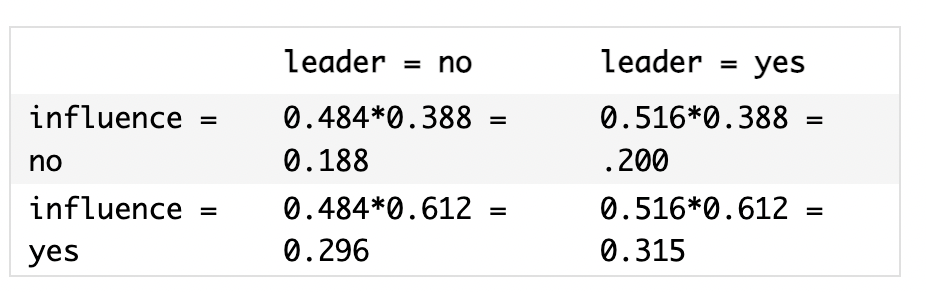

This table tells us that if there were no association between the leader and influence questions, we would expect 2087 people to answer no to both.

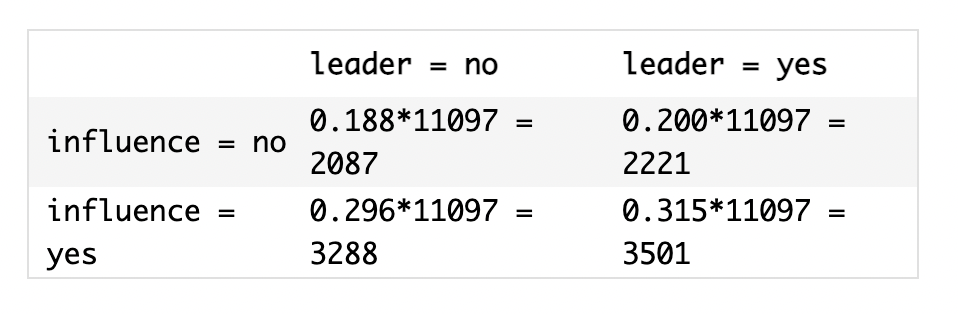

In python, we can calculate this table using the chi2_contingency() function from SciPy, by passing in the observed frequency table. There are actually four outputs from this function, but for now, we’ll only look at the fourth one:
```Python
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(influence_leader_freq)
print(np.round(expected))
```

Output
------
[[2087. 2221.]
 [3288. 3501.]]

Note that the ScyPy function returned the same expected frequencies as we calculated “by hand” above! Now that we have the expected contingency table if there’s no association, we can compare it to our observed contingency table:

``` python
leader       no   yes
influence            
no         3015  1293
yes        2360  4429
```

The more that the expected and observed tables differ, the more sure we can be that the variables are associated. In this example, we see some pretty big differences (eg., 3015 in the observed table compared to 2087 in the expected table). This provides additional evidence that these variables are associated.


In [16]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

npi = pd.read_csv("npi_sample.csv")

special_authority_freq = pd.crosstab(npi.special, npi.authority)
print("observed contingency table:")
print(special_authority_freq)

# calculate the expected contingency table if there's no association and save it as expected
chi2,pval,dof, expected = chi2_contingency(special_authority_freq)
expected =np.round(expected,2)

# print out the expected frequency table
print("expected contingency table (no association):",expected)


observed contingency table:
authority    no   yes
special              
no         4069  1905
yes        2229  2894
expected contingency table (no association): [[3390.49 2583.51]
 [2907.51 2215.49]]


# The Chi-Square Statistic

In the previous exercise, we calculated a contingency table of expected frequencies if there were no association between the leader and influence questions. We then compared this to the observed contingency table. Because the tables looked somewhat different, we concluded that responses to these questions are probably associated.

While we can inspect these tables visually, many data scientists use the Chi-Square statistic to summarize how different these two tables are. To calculate the Chi Square statistic, we simply find the squared difference between each value in the observed table and its corresponding value in the expected table, and then divide that number by the value from the expected table; finally add up those numbers:

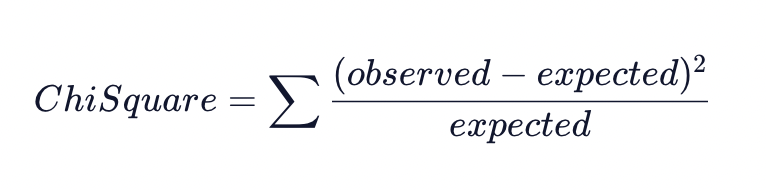

```python
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(influence_leader_freq)
print(chi2)
output: 1307.88

```
The interpretation of the Chi-Square statistic is dependent on the size of the contingency table. For a 2x2 table (like the one we’ve been investigating), a Chi-Square statistic larger than around 4 would strongly suggest an association between the variables.

In this example, our Chi-Square statistic is much larger than that — 1307.88! This adds to our evidence that the variables are highly associated.

In [17]:
# Use the chi2_contingency() function to calculate Chi-Square statistic for these two variables. 
# Save the result as chi2 and print it out. Do these variables appear to be associated?

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

npi = pd.read_csv("npi_sample.csv")

special_authority_freq = pd.crosstab(npi.special, npi.authority)

# calculate the chi squared statistic and save it as chi2, then print it:
chi2, pval, dof, expected = chi2_contingency(special_authority_freq)

print(chi2)

679.1219526170606


Suppose that a group of people are randomly assigned to either do 20 push-ups or 20 jumping jacks. We record their heart rate after each exercise and then create the following box plot showing heart rates by exercise type. Based on this plot, is there an association between type of exercise and heart rate?

# Step 1: Understand What “Association” Means Here
In this context, association means that the type of exercise (push-ups vs. jumping jacks) is related to heart rate — i.e., different exercises result in different heart rate patterns.

# Step 2: Use the Box Plot to Identify Association
A box plot shows the distribution of heart rates for each exercise type. You can analyze the following elements:

✅ Key features to compare:

| ✅ Key Feature        | What to Look For                                                                 |
|-----------------------|----------------------------------------------------------------------------------|
| Medians               | Are the middle values (lines inside boxes) clearly different?                   |
| Ranges / IQRs         | Is the spread of heart rate values wider for one group?                         |
| Outliers              | Are there more outliers in one group?                                           |
| Overlap of Boxes      | Do the boxes mostly overlap (suggesting similar distributions) or not?          |


# Conclusion Rule of Thumb:
If the medians are clearly different, and the boxes don’t overlap much,
→ There is likely an association between exercise type and heart rate.

If the distributions are very similar,
→ There’s probably no association.

📌 Example Interpretation:
Let’s suppose you see the following from the box plot:

Jumping jacks have a higher median heart rate than push-ups.

The box for jumping jacks is higher and does not overlap much with the push-up group.

✅ This suggests:

Yes, there is an association: the type of exercise influences heart rate.


## 📊 Which Method Can Be Used to Visually Examine an Association Between Two Quantitative Variables?

### ✅ Best Method: **Scatter Plot**

A **scatter plot** displays values for two quantitative variables using points (x, y). Each point represents one observation.

---

### 📈 Why Use a Scatter Plot?

| Feature        | What It Shows                                 |
|----------------|-----------------------------------------------|
| **Direction**  | Positive, negative, or no association         |
| **Form**       | Linear, curved, clusters, etc.                |
| **Strength**   | How tightly points follow a trend             |
| **Outliers**   | Unusual values far from the overall pattern   |

---

### 🔍 Example:

Suppose you're examining:
- **X-axis**: Hours studied  
- **Y-axis**: Exam score

A scatter plot can help reveal:
- ✅ **Positive association** (more study = higher score)
- ❌ **No association** (random spread of points)

### Note:
```python
Plot Type	     Use When...
Box Plot	     Comparing 1 numeric variable across categories
Scatter Plot	     Exploring association between two numeric variables
```
---


In [20]:
pip install numpy

You should consider upgrading via the '/Users/logambigaikuppusamy/Documents/DataScience/Financeanalyst/venv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


np.set_printoptions(suppress=True, precision = 2)

nba = pd.read_csv('nba_games.csv')

# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

print(nba_2010.head())
print(nba_2014.head())

knicks_pts_10 = nba_2010.pts[nba.fran_id=='Knicks']
nets_pts_10 = nba_2010.pts[nba.fran_id=='Nets']


            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  
            game_id  year_id  fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014     Nets  Cavaliers             A            0   
23469  201310

9.731707317073173


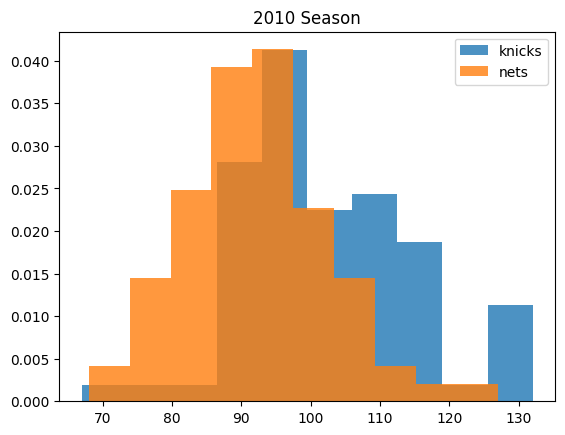

0.44706798131809933


In [8]:
# If the difference is large, it suggests that fran_id (team) and pts (points scored) may be associated, meaning the team could influence the points scored. If the difference is small, there may be little or no association. Always check the full distribution for a complete picture.
diff_means_2010 = np.mean(knicks_pts_10) - np.mean(nets_pts_10)
print(diff_means_2010)

plt.hist(knicks_pts_10, alpha=0.8, density = True, label='knicks')
plt.hist(nets_pts_10, alpha=0.8, density = True, label='nets')
plt.legend()
plt.title("2010 Season")
plt.show()

knicks_pts_14 = nba_2014.pts[nba.fran_id=='Knicks']
nets_pts_14 = nba_2014.pts[nba.fran_id=='Nets']

# If the difference is large, it suggests that fran_id (team) and pts (points scored) may be associated, meaning the team could influence the points scored. If the difference is small, there may be little or no association. Always check the full distribution for a complete picture.
diff_means_2014 = np.mean(knicks_pts_14) - np.mean(nets_pts_14)
print(diff_means_2014)

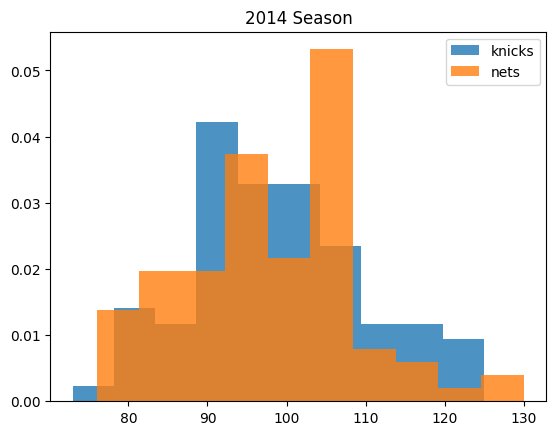

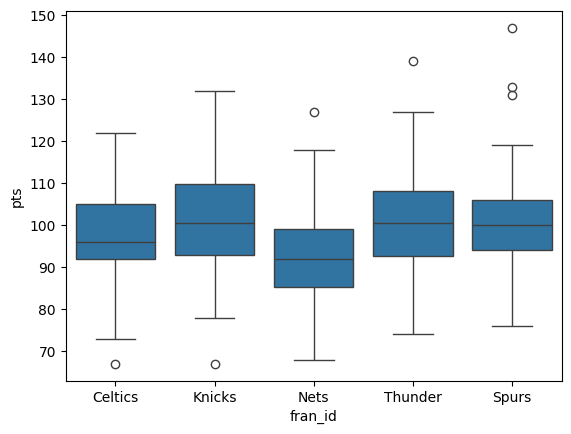

In [9]:
plt.hist(knicks_pts_14, alpha=0.8, density = True, label='knicks')
plt.hist(nets_pts_14, alpha=0.8, density = True, label='nets')
plt.legend()
plt.title("2014 Season")
plt.show()

# boxplot for 2010 data

plt.clf() #to clear the previous plot
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()


game_location    A    H
game_result            
L              133  105
W               92  120
game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667
[[119. 119.]
 [106. 106.]]
6.501704455367053
[[  0.05   1.37]
 [  1.37 186.56]]
PearsonRResult(statistic=np.float64(0.4402088708468084), pvalue=np.float64(9.410391573139187e-23))


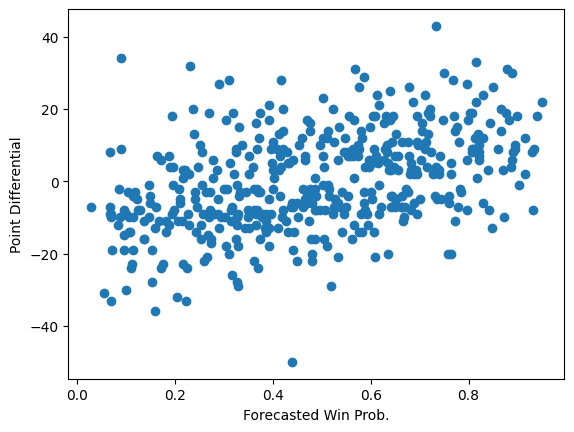

In [ ]:
# Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location

location_result_freq = pd.crosstab(nba_2010.game_result,nba_2010.game_location)
print(location_result_freq)

# Convert this table of frequencies to a table of proportions and save the result as location_result_proportions. Print your result.

location_result_proportions = location_result_freq/len(nba_2010)
print(location_result_proportions)

# Using the contingency table we created in Task 6 (use the counts – NOT the proportions), calculate the expected contingency table (if there were no association) and the Chi-Square statistic and print your results. Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?

chi2, pval,dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

# Using nba_2010, calculate the covariance between forecast (538’s projected win probability) and point_diff (the margin of victory/defeat) in the dataset. Call this point_diff_forecast_cov. Save and print your result. Looking at the matrix, what is the covariance between these two variables?

point_diff_forecast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_cov)


# Using nba_2010, calculate the correlation between forecast and point_diff. Call this point_diff_forecast_corr. Save and print your result. Does this value suggest an association between the two variables?

point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

# Generate a scatter plot of forecast (on the x-axis) and point_diff (on the y-axis). Does the correlation value make sense?
plt.clf() #to clear the previous plot
plt.scatter('forecast', 'point_diff', data=nba_2010)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()
